In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier
import time
import tabulate


# Train DATA

In [2]:
train_df = pd.read_csv('C:/Users/Pctec/anaconda3/envs/tensorflow/Intrusion_detection/intrusion/Train_data.csv')

In [3]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25187    False
25188    False
25189    False
25190    False
25191    False
Length: 25192, dtype: bool

In [8]:
dup_train = train_df[train_df.duplicated()]
dup_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


In [9]:
train_df['class'].value_counts()


normal     13449
anomaly    11743
Name: class, dtype: int64

## TEST DATA

In [10]:
test_df = pd.read_csv('C:/Users/Pctec/anaconda3/envs/tensorflow/Intrusion_detection/intrusion/Test_data.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [11]:
test_df.shape

(22544, 41)

In [12]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
dup_test = test_df[test_df.duplicated()]
dup_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2496,0,udp,private,SF,105,146,0,0,0,0,...,255,253,0.99,0.01,0.00,0.0,0.00,0.0,0.00,0.0
4199,0,udp,private,SF,105,146,0,0,0,0,...,255,252,0.99,0.01,0.01,0.0,0.00,0.0,0.00,0.0
5508,0,udp,private,SF,105,146,0,0,0,0,...,255,255,1.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
6948,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.00,0.01,0.01,0.0,0.00,0.0,0.00,0.0
8326,0,udp,private,SF,105,105,0,0,0,0,...,255,255,1.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
8434,0,udp,private,SF,105,105,0,0,0,0,...,255,255,1.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
8610,0,udp,private,SF,105,147,0,0,0,0,...,255,255,1.00,0.00,0.01,0.0,0.00,0.0,0.00,0.0
9593,0,udp,private,SF,105,147,0,0,0,0,...,255,254,1.00,0.01,0.00,0.0,0.00,0.0,0.00,0.0
9698,0,udp,private,SF,105,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.0,0.00,0.0,0.00,0.0
9803,0,udp,private,SF,105,147,0,0,0,0,...,255,253,0.99,0.01,0.01,0.0,0.00,0.0,0.00,0.0


In [14]:
test_df.drop(test_df[test_df.duplicated() == True].index, axis = 0, inplace = True)
test_df.reset_index(drop=True)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22483,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22484,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22485,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [15]:
#extract and standarize numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = train_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train_df.select_dtypes(include=numerics)
test = test_df.select_dtypes(include=numerics)
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)


In [16]:
# turn the result back to a dataframe
train_sc = pd.DataFrame(train_sc, columns = cols)
test_sc = pd.DataFrame(test_sc, columns = cols)

In [17]:
test_sc

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155736,-0.022015,-0.097005,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,0.651203,-1.167547,-1.303179,-0.138723,-0.432468,-0.230287,-0.358608,-0.353252,1.977417,1.926793
1,-0.155736,-0.022015,-0.097005,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,0.651203,-1.248064,-1.394973,-0.138723,-0.432468,-0.230287,-0.358608,-0.353252,1.977417,1.926793
2,-0.154316,0.005411,-0.097005,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,-0.634643,-0.487619,0.004881,-0.229342,1.557219,0.003646,-0.358608,-0.353252,-0.603557,-0.566224
3,-0.155736,-0.021973,-0.097005,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,-2.026757,-0.747065,0.899870,-0.410580,2.829313,3.044781,-0.358608,-0.353252,-0.603557,-0.566224
4,-0.155026,-0.022015,-0.096299,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,-1.750459,-0.487619,-0.683571,0.359681,-0.334614,0.003646,-0.358608,-0.353252,1.538651,1.203818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,-0.155736,-0.020338,-0.081331,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,1.120577,-0.016514,...,-0.995955,0.004434,0.257314,-0.138723,-0.399850,-0.113320,-0.322036,-0.353252,-0.603557,-0.566224
22483,-0.155736,-0.021346,-0.052855,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,1.120577,-0.016514,...,0.034847,1.024326,0.899870,-0.410580,-0.399850,-0.113320,-0.322036,-0.353252,-0.603557,-0.566224
22484,-0.155736,0.093200,0.294325,-0.017646,-0.059179,-0.019484,2.037870,-0.144185,1.120577,0.120874,...,0.651203,1.024326,0.899870,-0.410580,-0.432468,-0.230287,-0.358608,-0.353252,-0.422888,-0.391713
22485,-0.155736,-0.021927,-0.095028,-0.017646,-0.059179,-0.019484,-0.113667,-0.144185,-0.892397,-0.016514,...,0.651203,0.997486,0.876921,-0.365270,-0.432468,-0.230287,-0.358608,-0.353252,-0.603557,-0.566224


In [18]:
#extract and encode categorical attributes from train and test dataframes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train = train_df.select_dtypes(include=['object'])
test = test_df.select_dtypes(include=['object'])

train_enc = train.apply(le.fit_transform)
test_enc = test.apply(le.fit_transform)


In [19]:
#seperate target class
y = train_enc[['class']].copy()
#train_enc = train_enc.drop(['class'], axis=1)


In [20]:
#combine both standarzed numerical and encoded categorical features in a single train frame
train_x = pd.concat([train_sc,train_enc],axis=1)
train_y = y['class']
print(train_x.shape)
print(train_y.shape)

(25192, 42)
(25192,)


In [21]:
test_x = pd.concat([test_sc,test_enc],axis=1)
test_x.shape

(22544, 41)

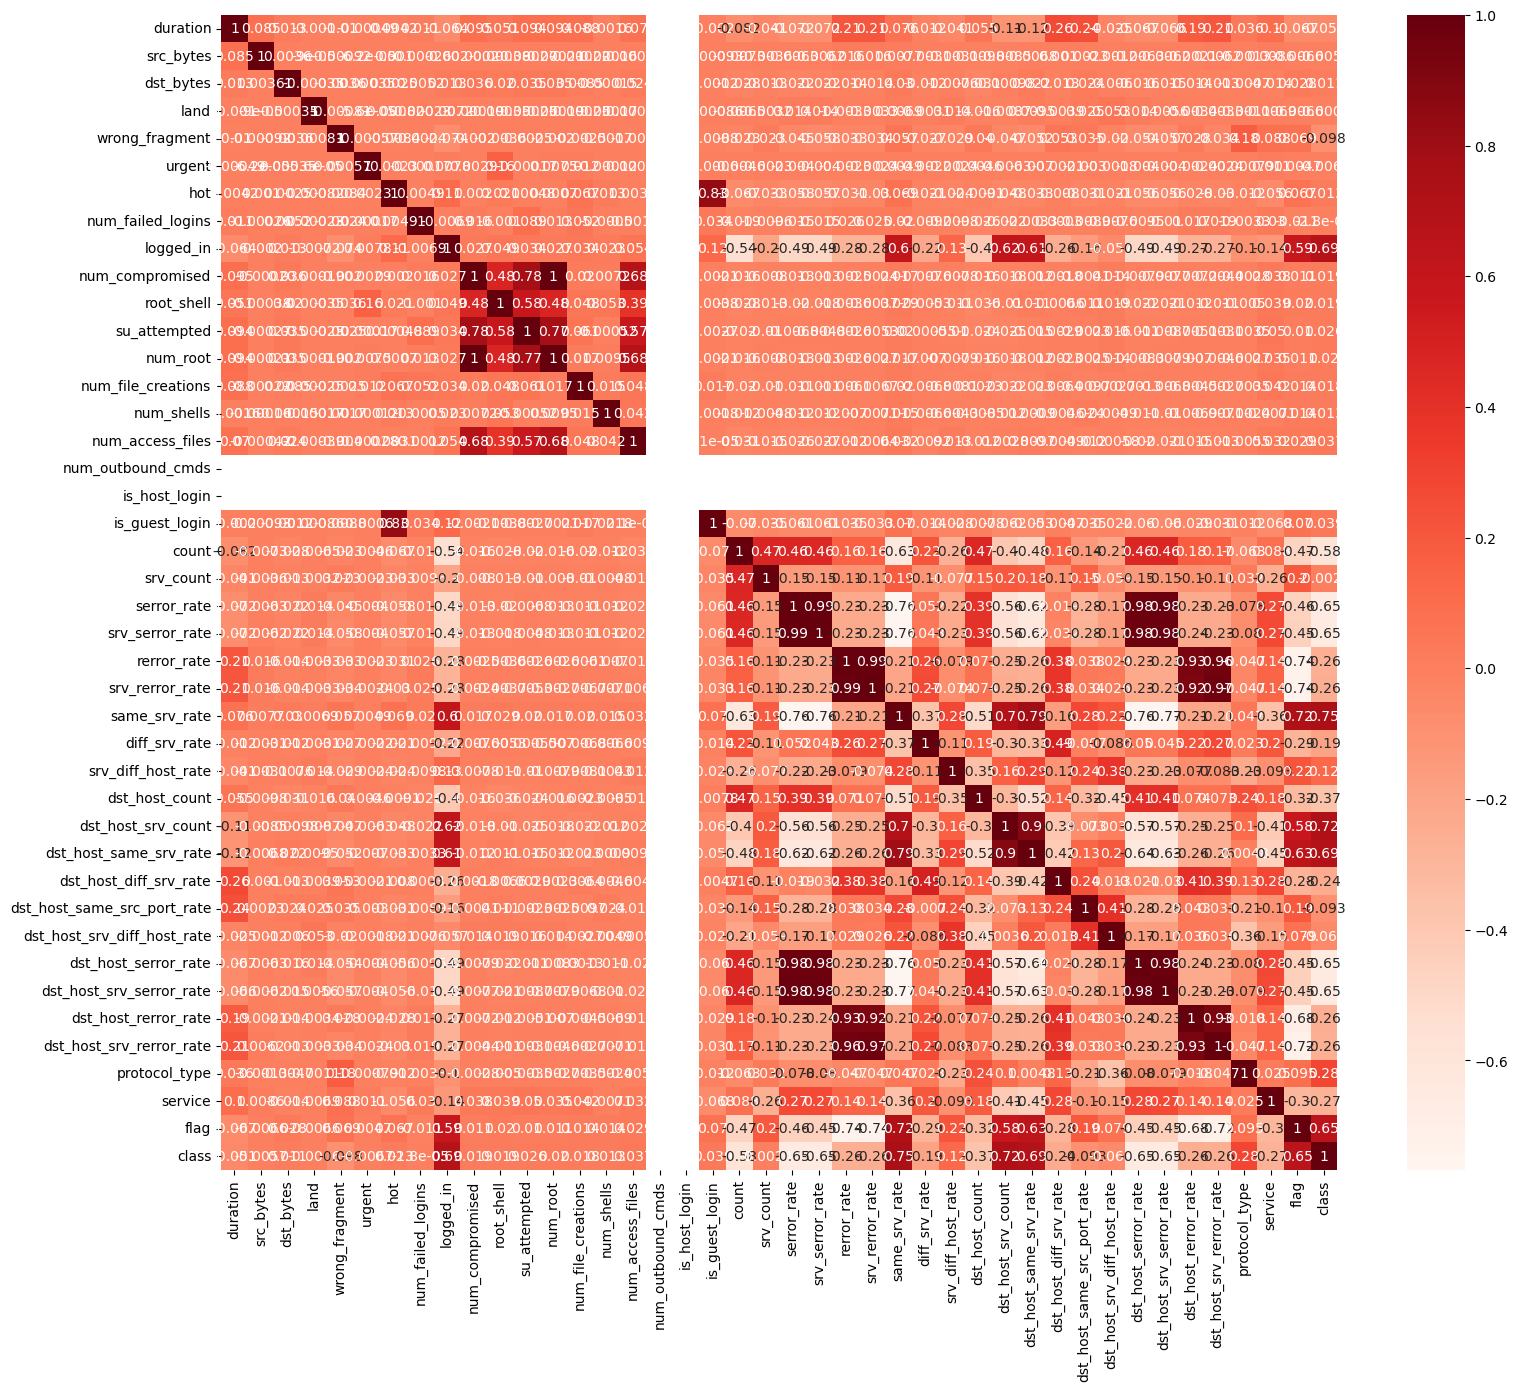

In [22]:
plt.figure(figsize=(18,15))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, )
plt.show()

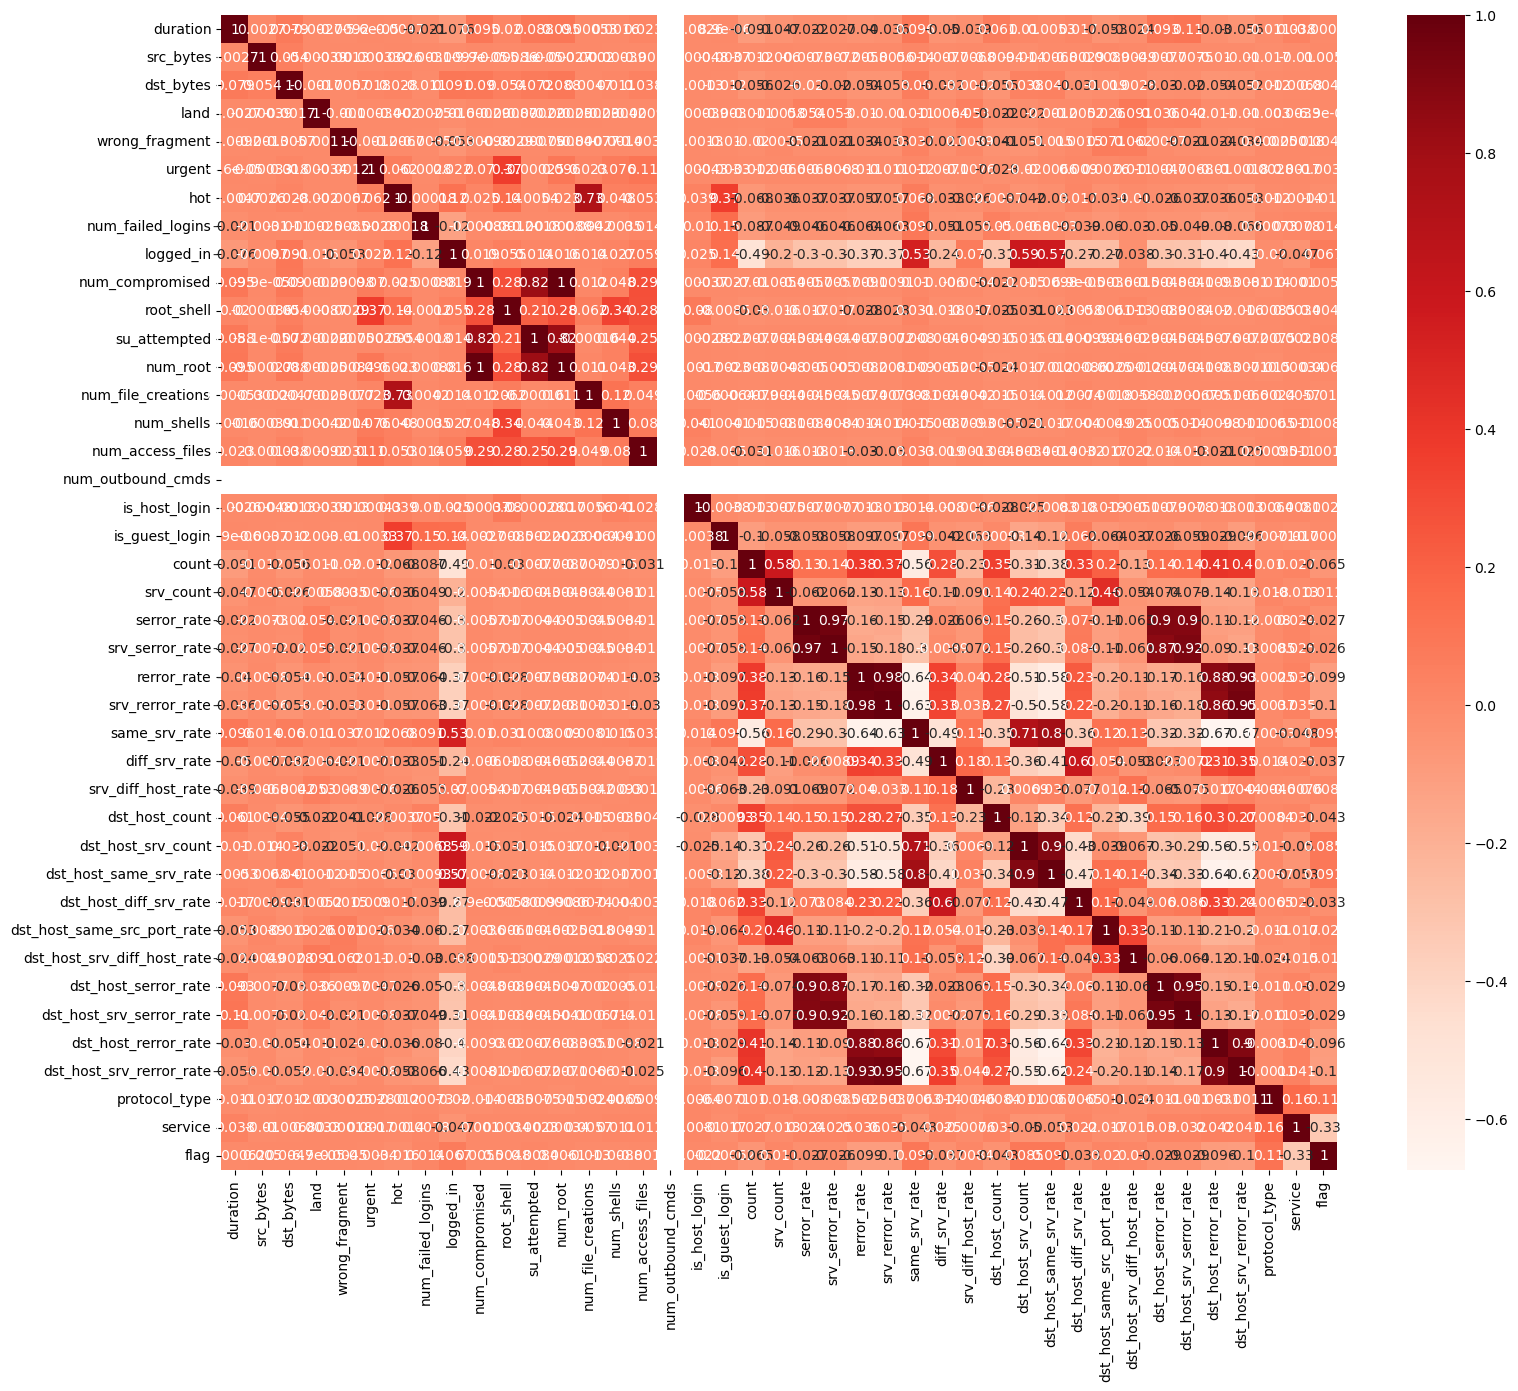

In [23]:
plt.figure(figsize=(18,15))
cor = test_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, )
plt.show()

In [24]:
#remove redundant column from both train & test datasets 
train_x.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
test_x.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)


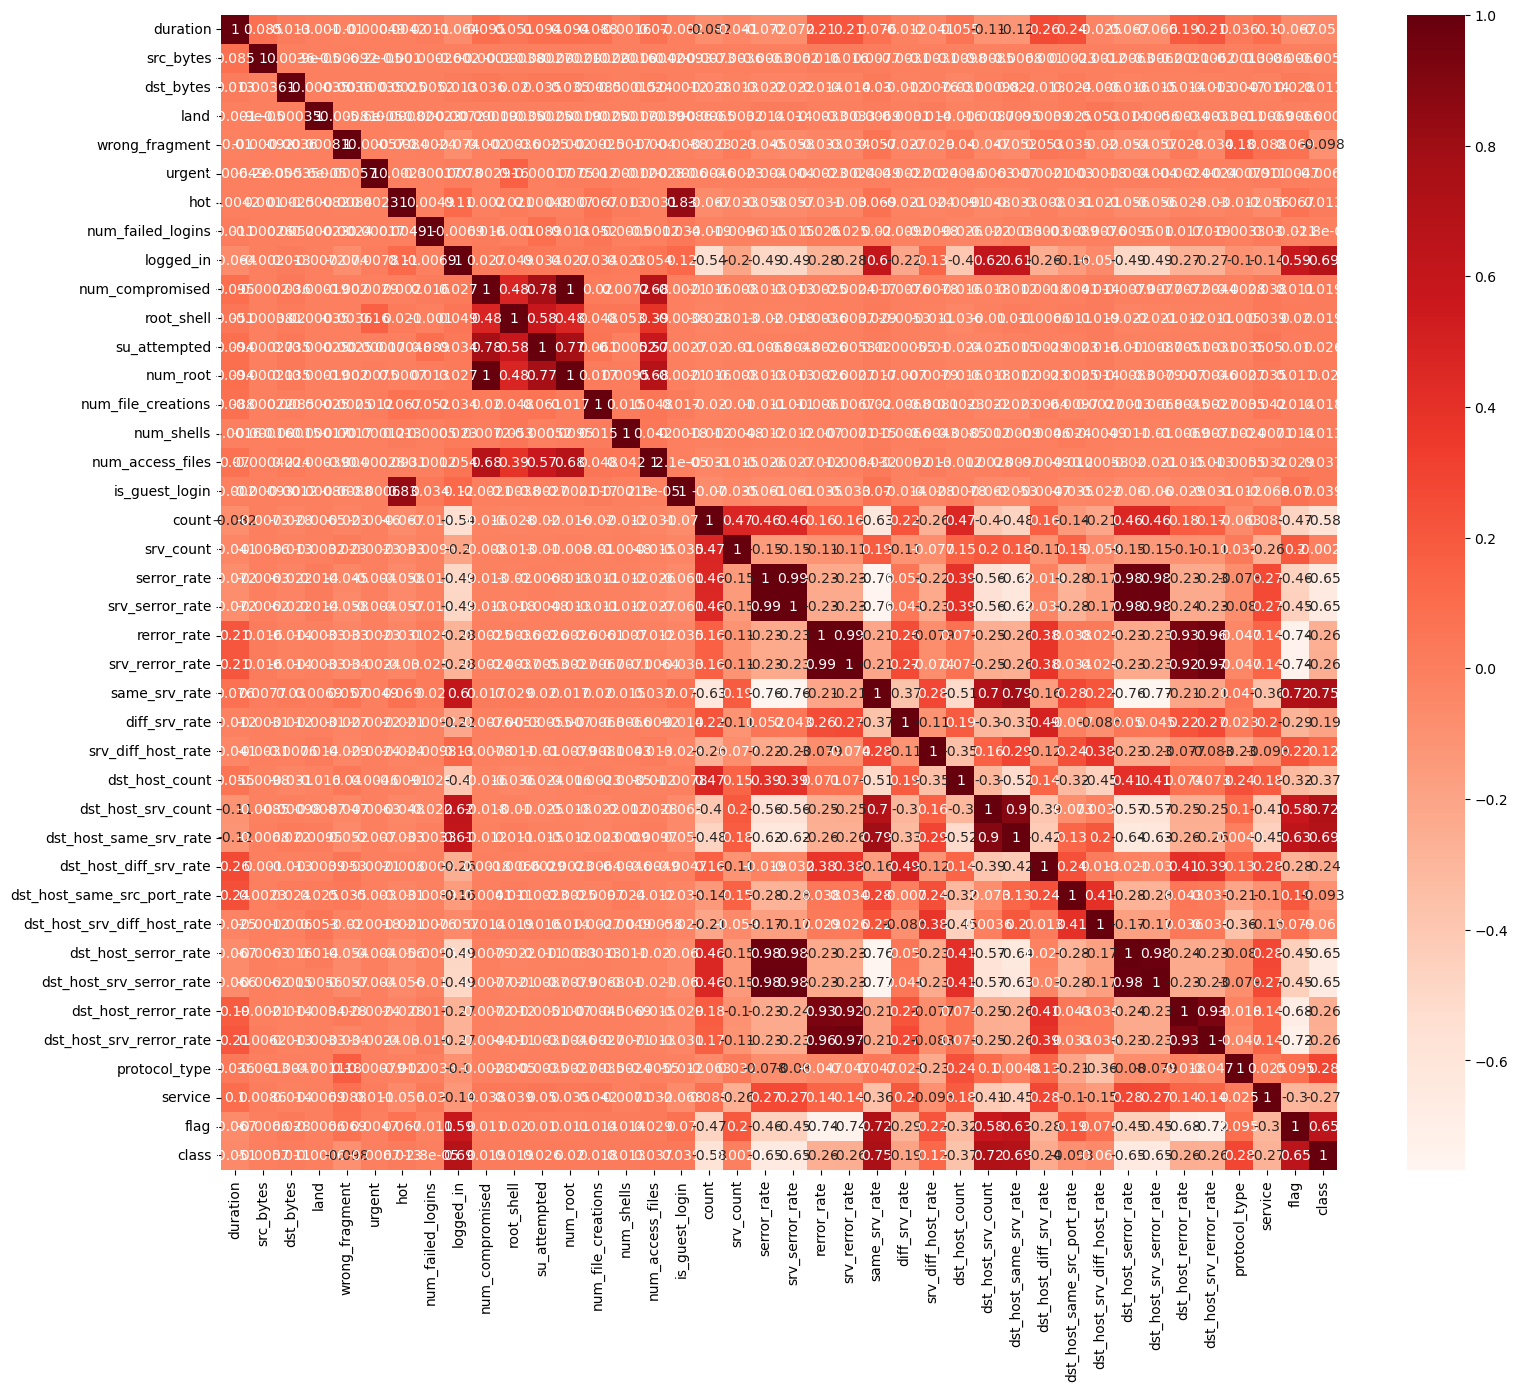

In [25]:
plt.figure(figsize=(18,15))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, )
plt.show()

# First approach : using highly correlated features

In [26]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

logged_in                   0.688084
count                       0.578790
serror_rate                 0.649952
srv_serror_rate             0.647817
same_srv_rate               0.749237
dst_host_srv_count          0.719292
dst_host_same_srv_rate      0.692212
dst_host_serror_rate        0.651050
dst_host_srv_serror_rate    0.653759
flag                        0.651309
class                       1.000000
Name: class, dtype: float64

In [27]:
train_x_1=train_x
train_x_2=train_x

In [28]:
train_x = train_x.drop(['class'], axis=1)


In [29]:
train_x = train_x[["logged_in","count","serror_rate","srv_serror_rate","same_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","dst_host_serror_rate","dst_host_srv_serror_rate","flag"]]

In [30]:
test_x = test_x[["logged_in","count","serror_rate","srv_serror_rate","same_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","dst_host_serror_rate","dst_host_srv_serror_rate","flag"]]

In [31]:
from sklearn.model_selection import train_test_split
#train_x= train_x[selected_features]
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.80, random_state=35)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(20153, 10) (20153,)
(5039, 10) (5039,)


In [32]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
t1=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=10)
DTC_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Decision Tree: ", t2-t1)
print()

t1=time.time()
XGB_Classifier = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for XGBoost: ", t2-t1)
print()

t1=time.time()
RandomForest_Classifier = RandomForestClassifier(n_estimators=1)
RandomForest_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Random Forest: ", t2-t1)
print()
t1=time.time()
ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=1)
ExtraTreesClassifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Extra trees Forest: ", t2-t1)
print()
t1=time.time()
svc = SVC()
svc.fit(X_train, Y_train)
t2=time.time()
print("Training time for SVM: ", t2-t1)
print()

Training time for Decision Tree:  0.05657505989074707

Training time for XGBoost:  0.8976035118103027

Training time for Random Forest:  0.023002147674560547

Training time for Extra trees Forest:  0.023998260498046875

Training time for SVM:  3.7894554138183594



In [33]:
from sklearn import metrics
from sklearn.metrics import f1_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))
models.append(('Extra trees Classifier', ExtraTreesClassifier))



for i,v in models:
    scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test), digits=8)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8747763419483101

Model Accuracy:
 0.8747767414169478

Confusion matrix:
 [[1840  524]
 [ 107 2568]]

Classification report:
               precision    recall  f1-score   support

           0  0.94504366 0.77834179 0.85363025      2364
           1  0.83053040 0.96000000 0.89058436      2675

    accuracy                      0.87477674      5039
   macro avg  0.88778703 0.86917090 0.87210730      5039
weighted avg  0.88425323 0.87477674 0.87324768      5039



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8997830477452744

Model Accuracy:
 0.9001786068664418

Confusion matrix:
 [[1876  488]
 [  15 2660]]

Classification report:
               precision    recall  f1-score   support

           0  0.99206769 0.79357022 0.88178613      2364
           1  0.844980

## Second approach : using Lasso Regularization

In [34]:
reg = LassoCV()
reg.fit(train_x_1, train_y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(train_x_1, train_y))
coef = pd.Series(reg.coef_, index = train_x_1.columns)

Best alpha using built-in LassoCV: 0.002099
Best score using built-in LassoCV: 0.999897


In [35]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 33 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

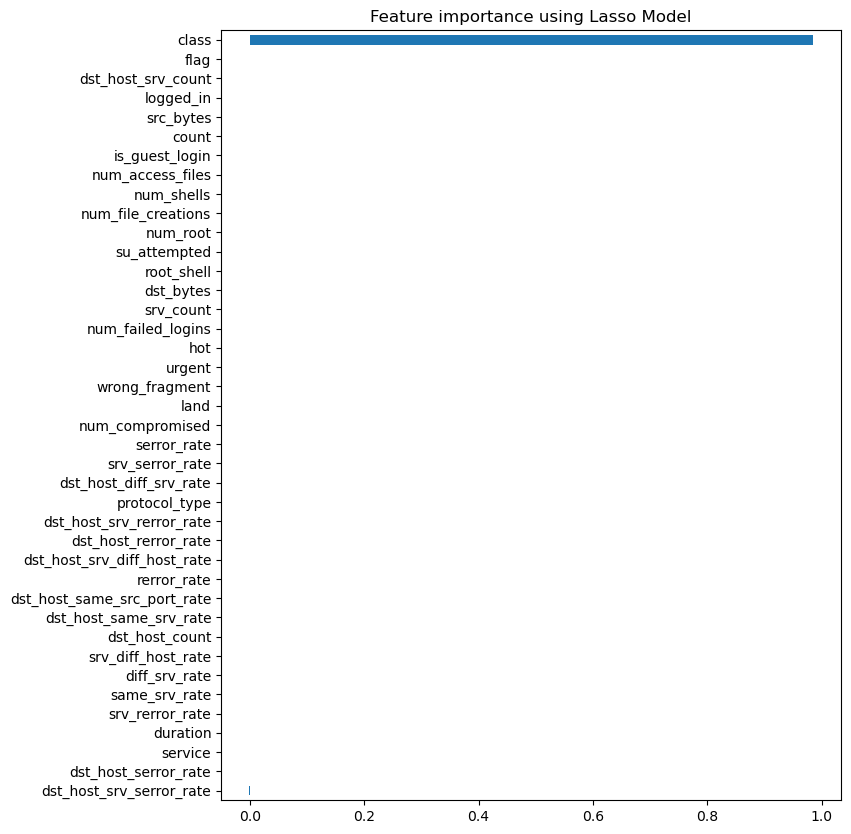

In [36]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [37]:
train_x_1 =  train_x_1.drop(['class'], axis=1)


In [38]:
imp_coef

dst_host_srv_serror_rate      -0.000749
dst_host_serror_rate          -0.000033
service                       -0.000031
duration                      -0.000000
srv_rerror_rate                0.000000
same_srv_rate                  0.000000
diff_srv_rate                 -0.000000
srv_diff_host_rate            -0.000000
dst_host_count                -0.000000
dst_host_same_srv_rate         0.000000
dst_host_same_src_port_rate   -0.000000
rerror_rate                    0.000000
dst_host_srv_diff_host_rate   -0.000000
dst_host_rerror_rate           0.000000
dst_host_srv_rerror_rate       0.000000
protocol_type                  0.000000
dst_host_diff_srv_rate        -0.000000
srv_serror_rate               -0.000000
serror_rate                   -0.000000
num_compromised                0.000000
land                           0.000000
wrong_fragment                -0.000000
urgent                        -0.000000
hot                           -0.000000
num_failed_logins              0.000000


In [39]:
train_x_1 = train_x_1[["srv_rerror_rate","dst_host_srv_serror_rate","srv_count","dst_host_same_srv_rate","dst_host_count","dst_host_srv_rerror_rate","dst_host_srv_diff_host_rate","dst_host_diff_srv_rate","dst_host_serror_rate","hot","srv_diff_host_rate","dst_host_rerror_rate","flag","count","urgent","num_failed_logins","dst_bytes","root_shell","src_bytes","service","num_shells","num_file_creations","land","su_attempted","is_guest_login","diff_srv_rate","logged_in","dst_host_srv_count","same_srv_rate","protocol_type"]]

In [40]:
from sklearn.model_selection import train_test_split
#train_x= train_x[selected_features]
X_train,X_test,Y_train,Y_test = train_test_split(train_x_1,train_y,train_size=0.80, random_state=35)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20153, 30) (20153,)
(5039, 30) (5039,)


In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
t1=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=10)
DTC_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Decision Tree: ", t2-t1)
print()

t1=time.time()
XGB_Classifier = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for XGBoost: ", t2-t1)
print()

t1=time.time()
RandomForest_Classifier = RandomForestClassifier(n_estimators=1)
RandomForest_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Random Forest: ", t2-t1)
print()
t1=time.time()
ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=1)
ExtraTreesClassifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Extra trees Forest: ", t2-t1)
print()
t1=time.time()
svc = SVC()
svc.fit(X_train, Y_train)
t2=time.time()
print("Training time for SVM: ", t2-t1)
print()

Training time for Decision Tree:  0.027001142501831055

Training time for XGBoost:  0.08199405670166016

Training time for Random Forest:  0.02500009536743164

Training time for Extra trees Forest:  0.021999597549438477

Training time for SVM:  5.508025884628296



In [42]:
from sklearn import metrics
from sklearn.metrics import f1_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))
models.append(('Extra trees Classifier', ExtraTreesClassifier))
models.append(('Support vector Classifier', svc))



for i,v in models:
    scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test), digits=8)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8908525040234782

Model Accuracy:
 0.8910498114705299

Confusion matrix:
 [[1992  372]
 [ 177 2498]]

Classification report:
               precision    recall  f1-score   support

           0  0.91839557 0.84263959 0.87888815      2364
           1  0.87038328 0.93383178 0.90099188      2675

    accuracy                      0.89104981      5039
   macro avg  0.89438942 0.88823568 0.88994002      5039
weighted avg  0.89290780 0.89104981 0.89062212      5039



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9484020480292845

Model Accuracy:
 0.9491962691010121

Confusion matrix:
 [[2251  113]
 [ 143 2532]]

Classification report:
               precision    recall  f1-score   support

           0  0.94026734 0.95219966 0.94619588      2364
           1  0.957277

##  Third approach : using Random Forest

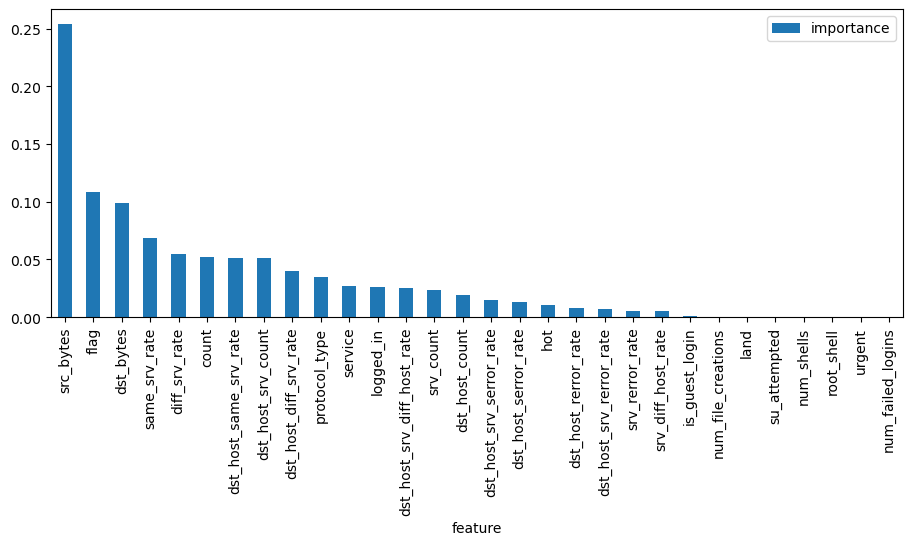

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x_1, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x_1.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [44]:
train_x_1 = train_x_1[["srv_rerror_rate","dst_host_srv_serror_rate","srv_count","dst_host_same_srv_rate","dst_host_count","dst_host_srv_rerror_rate","dst_host_srv_diff_host_rate","dst_host_diff_srv_rate","dst_host_serror_rate","hot","srv_diff_host_rate","dst_host_rerror_rate","flag","count","dst_bytes","src_bytes","service","is_guest_login","diff_srv_rate","logged_in","dst_host_srv_count","same_srv_rate","protocol_type"]]

In [45]:
from sklearn.model_selection import train_test_split
#train_x= train_x[selected_features]
X_train,X_test,Y_train,Y_test = train_test_split(train_x_1,train_y,train_size=0.80, random_state=35)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20153, 23) (20153,)
(5039, 23) (5039,)


In [46]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_train = BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
t1=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=10)
DTC_train = DTC_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Decision Tree: ", t2-t1)
print()

t1=time.time()
XGB_Classifier = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_train = XGB_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for XGBoost: ", t2-t1)
print()

t1=time.time()
RandomForest_Classifier = RandomForestClassifier(n_estimators=1)
RF_train = RandomForest_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Random Forest: ", t2-t1)
print()
t1=time.time()
ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=1)
ET_train = ExtraTreesClassifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Extra trees Forest: ", t2-t1)
print()
t1=time.time()
svc = SVC()
SVC_train = svc.fit(X_train, Y_train)
t2=time.time()
print("Training time for SVM: ", t2-t1)
print()

Training time for Decision Tree:  0.026184797286987305

Training time for XGBoost:  0.07900786399841309

Training time for Random Forest:  0.02499866485595703

Training time for Extra trees Forest:  0.02500295639038086

Training time for SVM:  4.820228338241577



In [47]:
from sklearn import metrics
from sklearn.metrics import f1_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))
models.append(('Extra trees Classifier', ExtraTreesClassifier))
models.append(('Support vector Classifier', svc))



for i,v in models:
    scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test), digits=8)

    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8908525040234782

Model Accuracy:
 0.8904544552490573

Confusion matrix:
 [[1992  372]
 [ 180 2495]]

Classification report:
               precision    recall  f1-score   support

           0  0.91712707 0.84263959 0.87830688      2364
           1  0.87024765 0.93271028 0.90039697      2675

    accuracy                      0.89045446      5039
   macro avg  0.89368736 0.88767494 0.88935192      5039
weighted avg  0.89224069 0.89045446 0.89003361      5039



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9484020480292845

Model Accuracy:
 0.9491962691010121

Confusion matrix:
 [[2251  113]
 [ 143 2532]]

Classification report:
               precision    recall  f1-score   support

           0  0.94026734 0.95219966 0.94619588      2364
           1  0.957277